# Loan Prediction Problem

This notebook deals with:
1. Exploring data
2. Distribution Analysis
3. Filling missing values
4. Building Predicitve model using:    
    a. Logistic Regression    
    b. Decision Trees   
    c. Random Forest Classifier
5. Implementing KFold Cross-validation

In [102]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [103]:
df = pd.read_csv("E:/aaaML Projects/train_loanPredict_AV.csv") # reading dataset into a dataframe

# Exploring data

In [104]:
df.head(10) # have a look at few top/bottom rows of the dataset
# df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [105]:
df.describe() # get summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [106]:
df['Property_Area'].value_counts() # to explore non-numerical variables

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Distribution Analysis

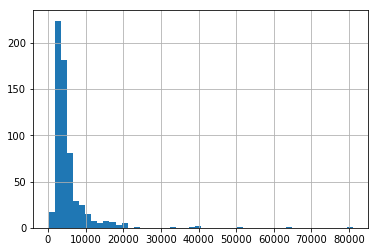

In [107]:
# distribution of various variables
df['ApplicantIncome'].hist(bins=50) 

# Here we observe that there are few extreme values. 
#This is also the reason why 50 bins are required to depict the distribution clearly.

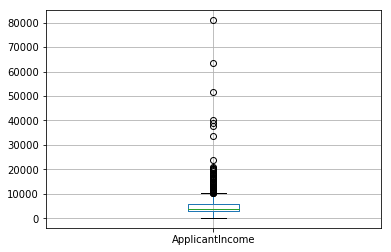

In [108]:
# we look at box plots to understand the distributions

df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. 
This can be attributed to the income disparity in the society. 
Part of this can be driven by the fact that we are looking at people with different education levels. 
Let us segregate them by Education

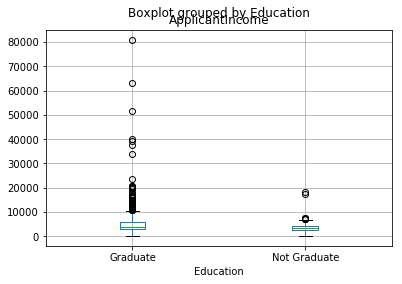

In [109]:
df.boxplot(column='ApplicantIncome', by ='Education')
# df.boxplot(column='ApplicantIncome', by ='Gender')

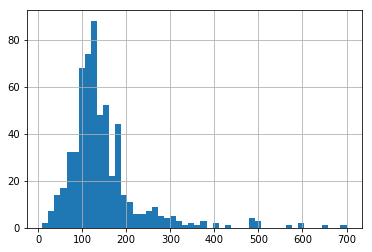

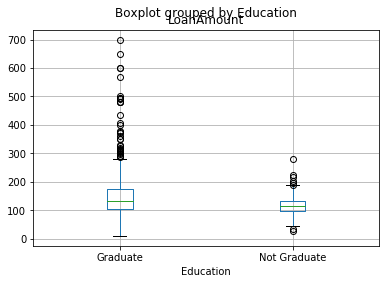

In [110]:
df['LoanAmount'].hist(bins=50) 
df.boxplot(column='LoanAmount', by ='Education')

In [111]:
#Chances of getting a loan based on credit history
count = df['Credit_History'].value_counts(ascending =True)
probab = df.pivot_table(values='Loan_Status', index = 'Credit_History', aggfunc = lambda x:x.map({'Y':1,'N':0}).mean())

print('Frequency table for Credit History')
print (count)

print('\nProbability of getting loan based on Credit history\n')
print(probab)

Frequency table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan based on Credit history

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


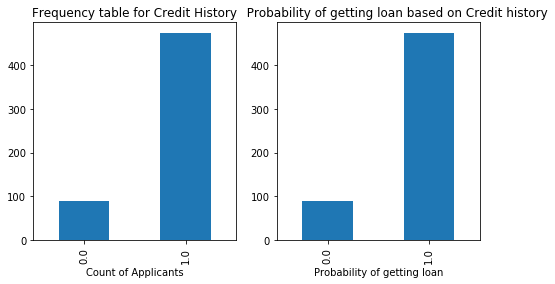

In [112]:
fig = plt.figure(figsize=(8,4)) # 8,4 - size of figure box to be plotted in inches
fig1 = fig.add_subplot(121) # 121 - 1 rows, 2 columns, 1 -plot # 
fig1.set_title('Frequency table for Credit History')
fig1.set_xlabel('Credit History')
fig1.set_xlabel('Count of Applicants')
count.plot(kind='bar')

fig1 = fig.add_subplot(122) # 121 - 1 rows, 2 columns, 2 -plot # 
fig1.set_title('          Probability of getting loan based on Credit history')
fig1.set_xlabel('Credit History')
fig1.set_xlabel('Probability of getting loan')
count.plot(kind='bar')

In [113]:
# Alternately, these two plots can also be visualized by combining them in a stacked chart::

stackPlot = pd.crosstab(df['Credit_History'], df['Loan_Status'])
print(stackPlot) # to understand crosstab

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


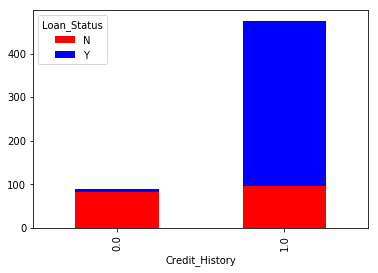

In [114]:
stackPlot.plot(kind='bar', stacked =True, color=['red','blue'],grid=False)

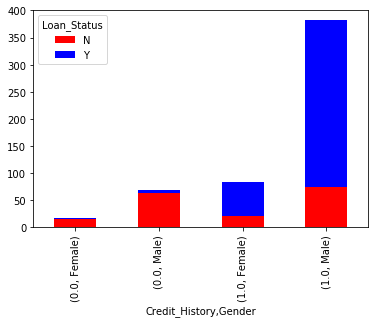

In [115]:
stackPlot1 = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status'])
stackPlot1.plot(kind='bar', stacked =True, color=['red','blue'],grid=False)

While our exploration of the data, we found a few problems in the data set, 
which needs to be solved before the data is ready for a good model. 
This exercise is typically referred as “Data Munging”:

1. There are missing values in some variables. We should estimate those values wisely depending on the amount of 
missing values and the expected importance of variables. - mean, median, mode, regression
2. While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values 
at either end. Though they might make intuitive sense, but should be treated appropriately. - ignore or replace with mean, 
median, mode, regression.
3. unpractical values, eg: Loan_Amount_Term =0 - shud be considered missing!

In addition to these problems with numerical fields, we should also look at the non-numerical fields 
i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.

In [116]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling Missing values

In [117]:
# fill NA loan amount spots by mean

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
print (sum(df['LoanAmount'].isnull()))


0


The other extreme could be to build a supervised learning model to predict loan amount on the basis of other 
variables and then use age along with other variables to predict survival.

Since, the purpose now is to bring out the steps in data munging, we rather take an approach, 
which lies some where in between these 2 extremes. A key hypothesis is that the whether a 
person is educated or self-employed can combine to give a good estimate of loan amount.

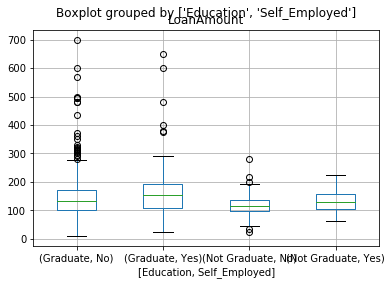

In [118]:
df.boxplot(column='LoanAmount', by =['Education','Self_Employed'])
# looks like the median values are slightly different & we can impute with the respective median values

In [119]:
# fill missing values with highest probable vaue
print (df['Self_Employed'].value_counts()) # shows 86% is no & hence median is no
df['Self_Employed'].fillna('No', inplace=True)
#print (dftemp['Self_Employed'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [120]:
#  fill missing values with median
table = df.pivot_table(values='LoanAmount', index = 'Self_Employed', columns = 'Education', aggfunc = np.median)
#print (table)

# To overwrite the original values of loan amount again to df to check 2nd method of filling missing values
dftemp = pd.read_csv("E:/aaaML Projects/train_loanPredict_AV.csv")
df['LoanAmount'] = dftemp['LoanAmount']
#print (sum(df['LoanAmount'].isnull()))

# Define function to return value of this pivot_table
def fillAge(d):
    return table.loc[d['Self_Employed'], d['Education']]

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fillAge,axis=1), inplace = True)
#print (sum(df['LoanAmount'].isnull()))


# Treating Outliers

Let’s analyze LoanAmount first. Since the extreme values are practically possible, 
i.e. some people might apply for high value loans due to specific needs. 
So instead of treating them as outliers, let’s try a log transformation to nullify their effect

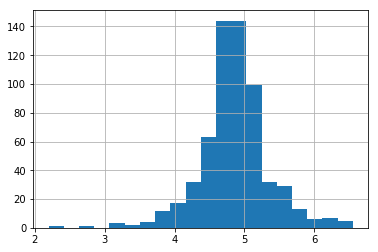

In [121]:
# treat for extreme values in distribution of LoanAmount and ApplicantIncome
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

#### Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. 
So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

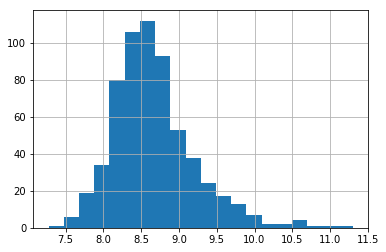

In [122]:
#df['ApplicantIncome'].hist(bins=20)
df['Combined_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Combined_Income_log'] =np.log(df['Combined_Income'])
df['Combined_Income_log'].hist(bins=20)

In [123]:
# fill missing values in Gender, Married, Dependents, Loan_Amount_Term, Credit_History, 

print (df['Gender'].value_counts()) # To understand highest count- to fill na
df['Gender'].fillna('Female', inplace=True)
#print (sum(df['Gender'].isnull())) # To check

print (df['Married'].value_counts())
df['Married'].fillna('Yes', inplace=True)
#print (sum(df['Gender'].isnull()))

print (df['Dependents'].value_counts())
df['Dependents'].fillna(0, inplace=True) # here 0 is nt int, but a string, so we are replacing int 0 with str 0
df['Dependents'] = df['Dependents'].replace({0:'0'}) # can use replace or map
#print(df.where(df['Dependents']=='0')) # where dint work here
#print (sum(df['Dependents'].isnull()))

print (df['Loan_Amount_Term'].value_counts())
df['Loan_Amount_Term'].fillna(360.0, inplace=True)
#print (sum(df['Loan_Amount_Term'].isnull()))

print (df['Credit_History'].value_counts())
df['Credit_History'].fillna(1.0, inplace=True)
#print (sum(df['Credit_History'].isnull()))


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


# Building a Predictive Model in Python

In [124]:
# Since, sklearn requires all inputs to be numeric, 
# we should convert all our categorical variables into numeric by encoding the categories. 

from sklearn.preprocessing import LabelEncoder

col_encode = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

encoder = LabelEncoder()

for i in col_encode:
    df[i] = encoder.fit_transform(df[i])
    
df.dtypes

Loan_ID                 object
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
LoanAmount_log         float64
Combined_Income        float64
Combined_Income_log    float64
dtype: object

In [125]:
#Import models from scikit learn module

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Generic function for making a classification model and accessing performance metrics, Kfold cross-validation

def classification_model(model, data, input_features, target):
   
    X = data[input_features]
    Y = data[target]
   
    #print (X.shape, Y.shape)
    
    # Fit the model
    # to make it multivariate, we have added X.shape[1]
    model.fit(X.values.reshape((X.shape[0],1)), Y.values.reshape((Y.shape[0],1))) # shape O/Ps a vector of no. of rows and cols, shape[0] = rows= length 
    
    #model.fit(data[input_features], np.ndarray(data[target]).values.reshape((614,1)))
    
    # Make predictions on training set
    predictions = model.predict(X.values.reshape((X.shape[0],1)))
    
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, Y)
    print("Accuracy: %s" % "{0:.3%}".format(accuracy)) # print accuracy of 0 to upto 3 decimal places after decimal point & remove insignificant trailing zeros
    
    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits = 5) 
    kf.get_n_splits(X)
    error = [] # to store cross-validtion error
    
    # for kfold use get_n_splits(X) and kf.split(X) for the for loop
    for train_index, test_index in kf.split(X):
       
        # Split the train and test as shown below, rather than using iloc
        # get our input_features: X
        X_train, X_test = X[train_index], X[test_index]
        
        # get our output:Y
        y_train, y_test = Y[train_index], Y[test_index]
        
        # print (X_test.shape[0], y_test.shape)

        #train_input = (X.iloc[train,:].values) # data[input_features]- an array, we take (iterate over) each row and all columns
        
        #train_target = (Y.iloc[train]) # data[target] is a vector, so we take each element, Y for each I/P row X
        
        # Training the algorithm using the input_features and target
        model.fit(X_train.values.reshape((X_train.shape[0],1)), y_train.values.reshape((y_train.shape[0],1)))
        
        # Record error from each cross-validation run
        error.append(model.score(X_test.values.reshape((X_test.shape[0],1)), y_test.values.reshape((y_test.shape[0],1))))
        
        print("Cross-validtion error: %s" % "{0:.3%}".format(np.mean(error)))
    

    # Fit the model again so that it can be refered outside the for-loop function
    model.fit(X.values.reshape((X.shape[0],1)), Y.values.reshape((Y.shape[0],1)))

### Logistic Regression

We have number of variables/features in our dataset, taking all of it will:
    1. result in a complex model
    2. result in overfitting
Intuitively, we can pick features that has most influence on the loan status like:
    1. Applicants having a credit history (remember we observed this in exploration?)
    2. Applicants with higher applicant and co-applicant incomes
    3. Applicants with higher education level
    4. Properties in urban areas with high growth perspectives

In [126]:
# So let’s make our first model with ‘Credit_History’.
target = 'Loan_Status'
model_logisticreg = LogisticRegression()
input_feature = 'Credit_History'
classification_model(model_logisticreg, df, input_feature, target)


Accuracy: 80.945%
Cross-validtion error: 80.488%
Cross-validtion error: 78.455%
Cross-validtion error: 79.133%
Cross-validtion error: 80.691%
Cross-validtion error: 80.946%


C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generally we expect the accuracy to increase on adding variables. 
But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by 
less important variables. Credit_History is dominating the mode. 

In [127]:
input_feature = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model_logisticreg, df, input_feature[0], target)

C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 80.945%
Cross-validtion error: 80.488%
Cross-validtion error: 78.455%
Cross-validtion error: 79.133%
Cross-validtion error: 80.691%
Cross-validtion error: 80.946%


We have two options now:
Feature Engineering: derive new information and try to predict those. I will leave this to your creativity.
Better modeling techniques. Let’s explore this next.

## Decision Tree

In [128]:
# Decision Tree is better than logistic regression

model_decisiontree =  DecisionTreeClassifier()
input_feature = ['Credit_History','Gender','Married','Education']
classification_model(model_decisiontree, df, input_feature[0], target)

Accuracy: 80.945%
Cross-validtion error: 80.488%
Cross-validtion error: 78.455%
Cross-validtion error: 79.133%
Cross-validtion error: 80.691%
Cross-validtion error: 80.946%


In [129]:
# Here the model based on categorical variables is unable to have an impact 
# because Credit History is dominating over them. Let’s try a few numerical variables:

input_feature = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model_decisiontree, df, input_feature[0], target)

# Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. 
# This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps:

Accuracy: 80.945%
Cross-validtion error: 80.488%
Cross-validtion error: 78.455%
Cross-validtion error: 79.133%
Cross-validtion error: 80.691%
Cross-validtion error: 80.946%


## Random Forest 

In [130]:
# Random Forest - An advantage with Random Forest is that we can make it work with all the features and 
# it returns a feature importance matrix which can be used to select features.

model_randomforest = RandomForestClassifier(n_estimators=100)
input_feature = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 
                 'Property_Area','LoanAmount_log','TotalIncome_log']
classification_model(model_randomforest, df, input_feature[6], target)


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 80.945%
Cross-validtion error: 80.488%


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross-validtion error: 78.455%
Cross-validtion error: 79.133%


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross-validtion error: 80.691%


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross-validtion error: 80.946%


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


If we see that the accuracy is 100% for the training set but cross-validation error is low - this is the ultimate case of 
overfitting and can be resolved in two ways:
  1. Reducing the number of predictors
  2. Tuning the model parameters

In [131]:
# First we see the feature importance matrix from which we’ll take the most important features.
impo_features = pd.Series(model_randomforest.feature_importances_, index = input_feature).sort_values(ascending = False)
print (impo_features)

TotalIncome_log     1.0
LoanAmount_log      1.0
Property_Area       1.0
Credit_History      1.0
Loan_Amount_Term    1.0
Self_Employed       1.0
Education           1.0
Dependents          1.0
Married             1.0
Gender              1.0
dtype: float64


In [132]:
# Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:
input_feature = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_randomforest, df, input_feature[2], target)


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 80.945%
Cross-validtion error: 80.488%


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross-validtion error: 78.455%
Cross-validtion error: 79.133%


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross-validtion error: 80.691%
Cross-validtion error: 80.946%


C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Notice that although accuracy reduced, but the cross-validation score is improving showing that the model is 
generalizing well. Remember that random forest models are not exactly repeatable. Different runs will result in 
slight variations because of randomization. But the output should stay in the ballpark.

You would have noticed that even after some basic parameter tuning on random forest, we have reached a
cross-validation accuracy only slightly better than the original logistic regression model. 
This exercise gives us some very interesting and unique learning:

Using a more sophisticated model does not guarantee better results.
Avoid using complex modeling techniques as a black box without understanding the underlying concepts. 
Doing so would increase the tendency of overfitting thus making your models less interpretable
Feature Engineering is the key to success. Everyone can use an Xgboost models but the real art and 
creativity lies in enhancing your features to better suit the model.
